In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.signal as sp
from scipy import signal
rc('font',family='serif')

In [2]:
file = open("data.bin", "r")
interleaved_data = np.fromfile(file, np.uint8)
file.close()

In [3]:
I_data_raw = interleaved_data[0:len(interleaved_data):2]
Q_data_raw = interleaved_data[1:len(interleaved_data):2]

I_samples = (I_data_raw-127.5)/127.5
Q_samples = (Q_data_raw-127.5)/127.5

complex_data = I_samples + 1j*Q_samples

In [4]:
plt.rcParams['figure.figsize'] = (16,9)

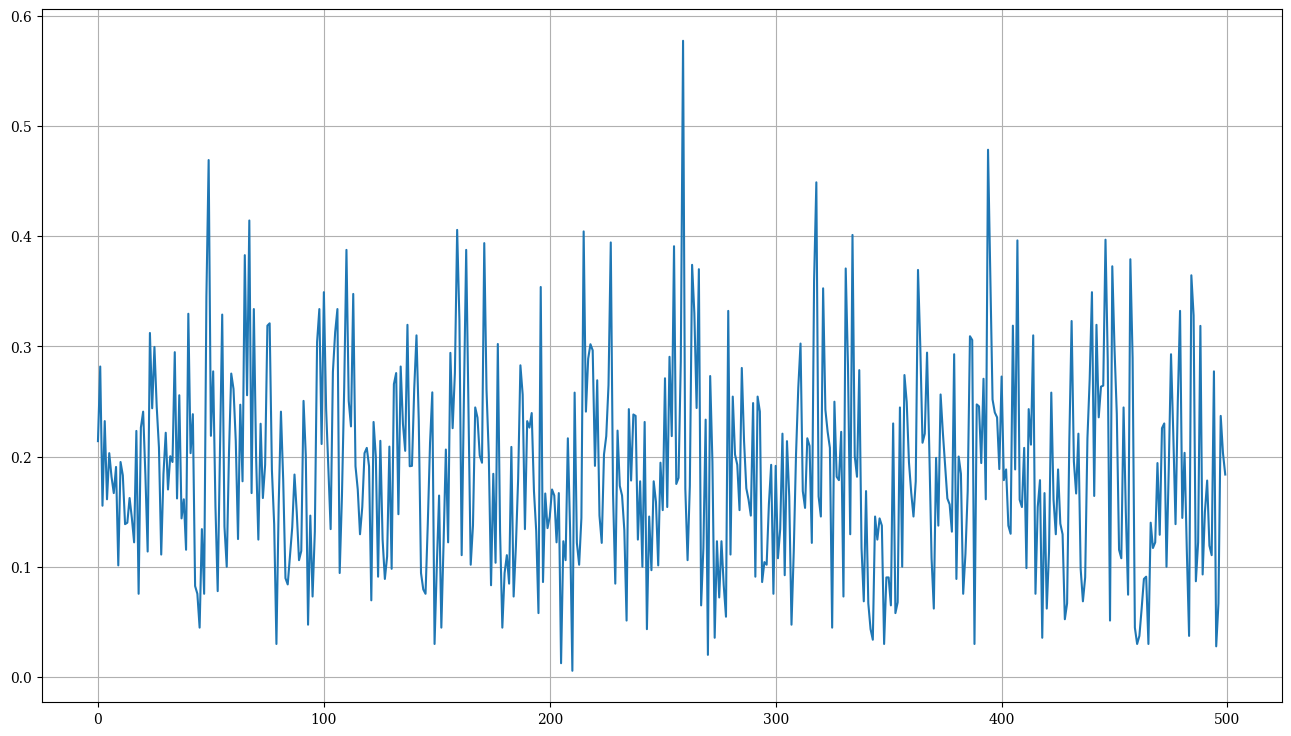

In [5]:
plt.figure(1)
plt.plot(np.abs(complex_data[15000:15500]))
plt.grid()
plt.show()

In [6]:
β = 0.5 #given
Fs = 2.4E6 #given
Ts = 1/200000 #2x symbol rate
N = 71 #Number of taps must be odd

In [7]:
t = (np.arange(N) - N / 2) / Fs    # equtions copied from textbook
taps = np.where(np.abs(2*t) == Ts / β,np.pi / 4 * np.sinc(t/Ts),np.sinc(t/Ts) * np.cos(np.pi*β*t/Ts) / (1 - (2*β*t/Ts) ** 2))

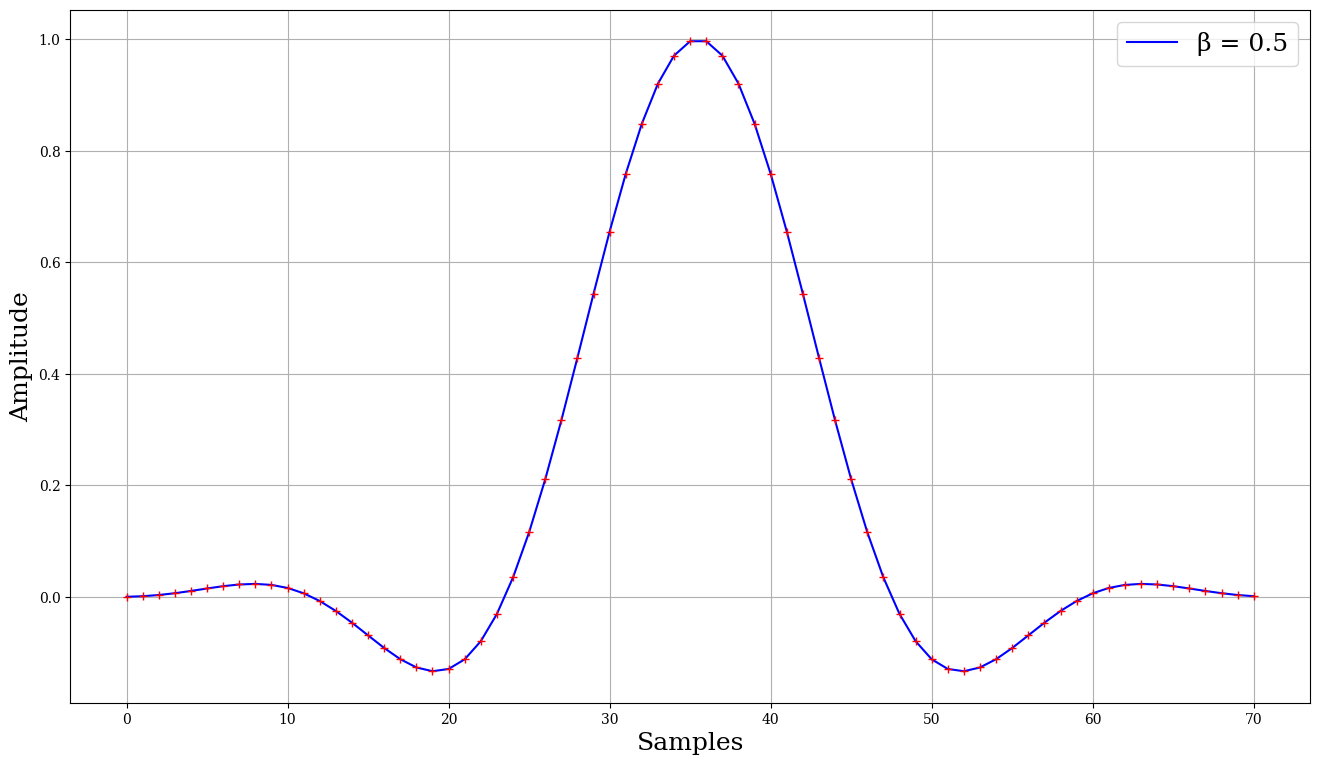

In [8]:
plt.figure(2)                       #function that plots the taps
plt.plot(taps,'b',label='β = 0.5')
plt.plot(taps,'r+')
plt.legend(fontsize=18)
plt.xlabel('Samples',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.grid()
plt.show()

In [9]:
start = 14400   
end = 39000
DATA_I = I_samples[start:end]
DATA_Q = Q_samples[start:end]
DATA_mag = np.abs(complex_data)[start:end]
DATA_I = DATA_I / DATA_mag.max()
DATA_Q = DATA_Q / DATA_mag.max()
DATA_signal = DATA_I + 1j*DATA_Q

In [10]:
f_signal = signal.lfilter(taps,1.0,DATA_signal)

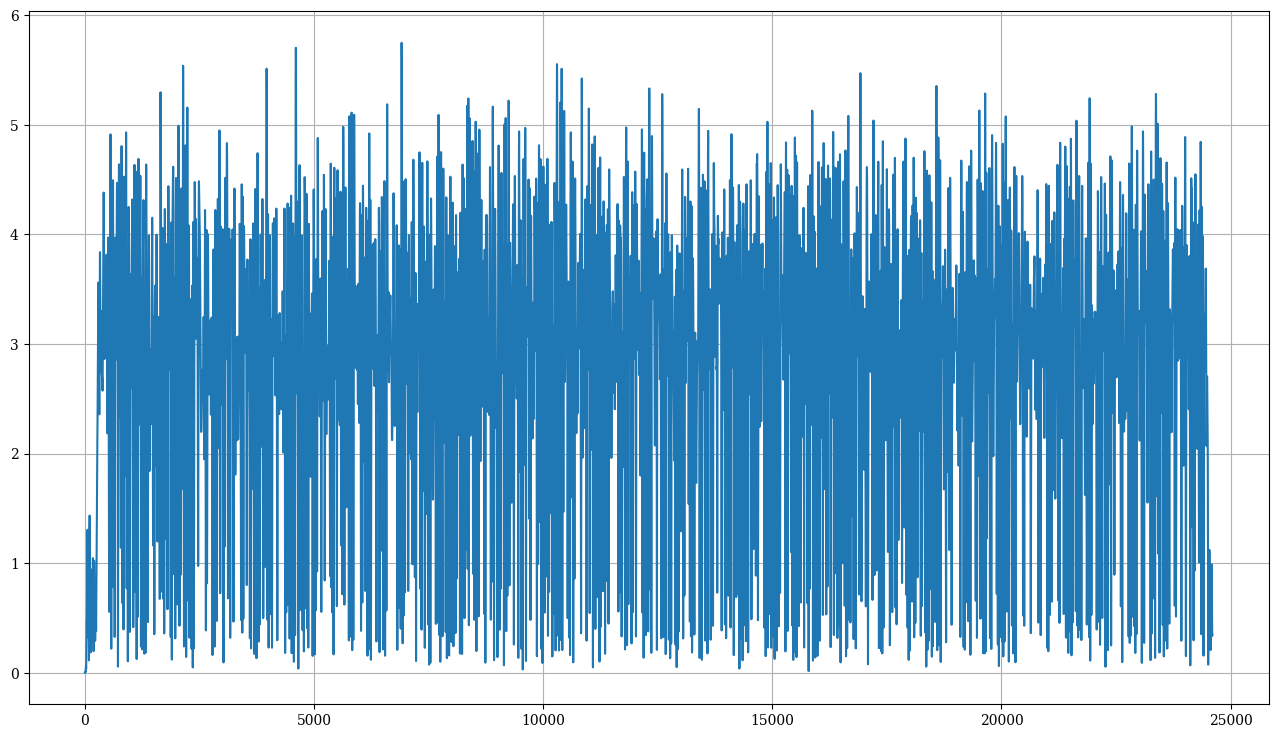

In [11]:
plt.figure(3)
plt.plot(np.abs(f_signal))
plt.grid()
plt.show()

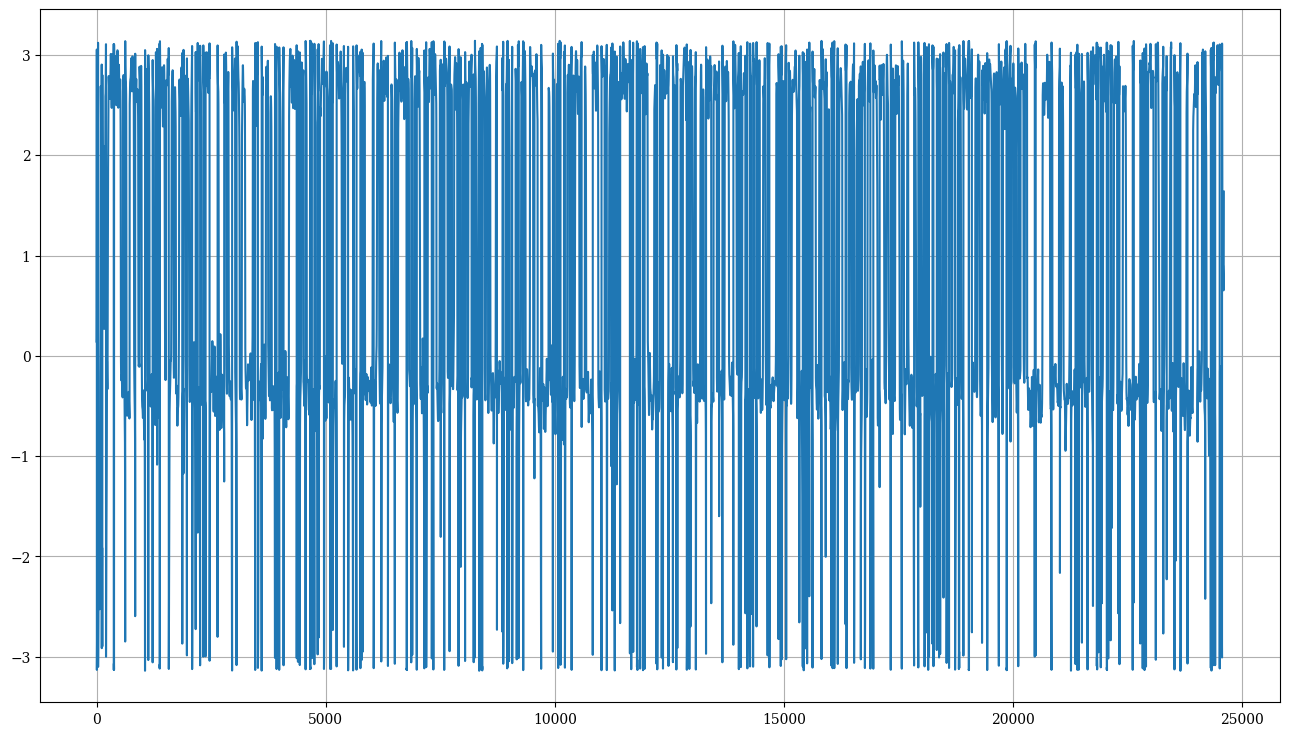

In [12]:
plt.figure(4)
plt.plot(np.angle(f_signal))
plt.grid()
plt.show()

In [13]:
SIGNAL = np.fft.fft(f_signal)
SIGNAL_MAG = 10*np.log10(np.abs(SIGNAL))
SIGNAL_ABS = np.fft.fft(np.abs(SIGNAL))
Φ = np.angle(SIGNAL_ABS)

In [14]:
DATA_SIGNAL = np.fft.fft(DATA_signal)
DATA_MAG = 10*np.log10(np.abs(DATA_SIGNAL))
DATA_SIGNAL_ABS = np.fft.fft(np.abs(DATA_signal))
DATA_MAG_ABS = 10*np.log10(np.abs(DATA_SIGNAL_ABS))
DATA_SIGNAL_Φ = np.angle(DATA_SIGNAL_ABS)

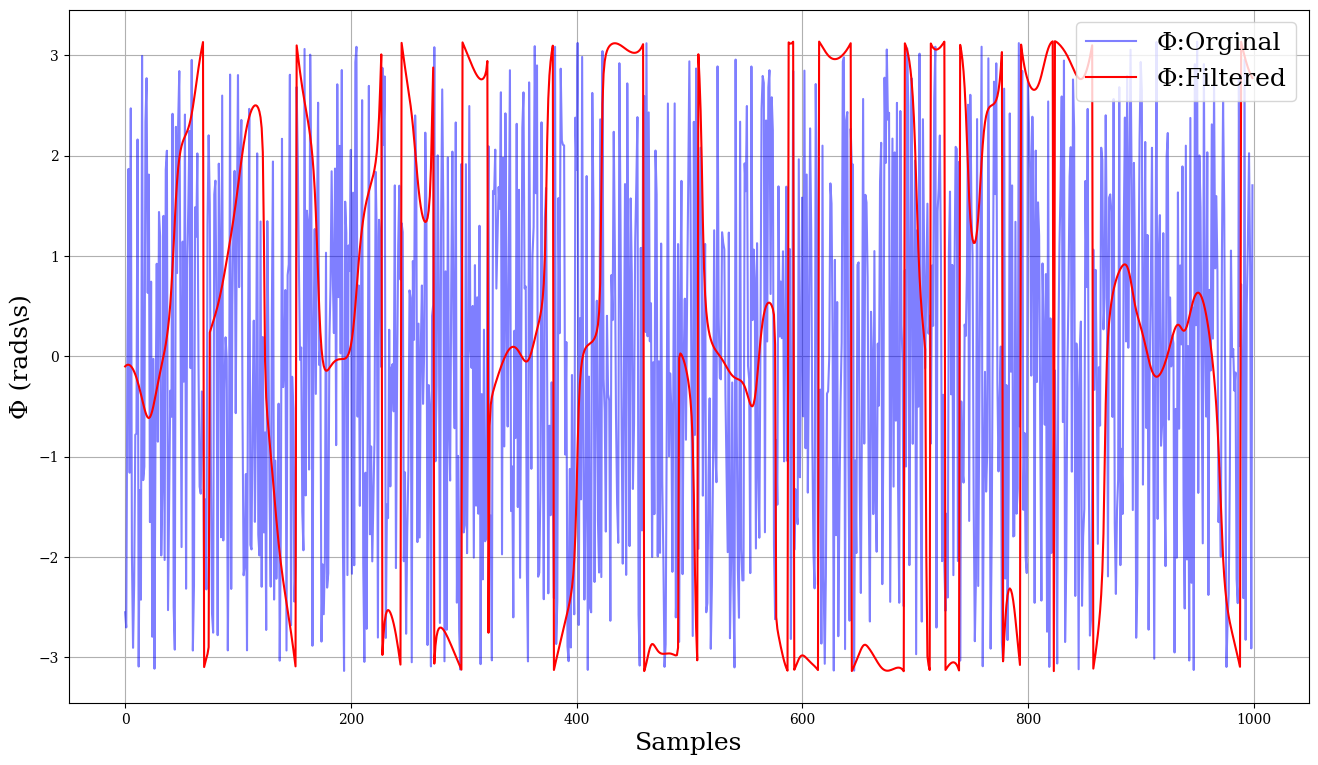

In [15]:
plt.figure(5)
plt.plot(DATA_SIGNAL_Φ[1000:2000],'b',alpha=0.5,label='Φ:Orginal')
plt.plot(Φ[1000:2000],'r',label='Φ:Filtered')
plt.legend(loc='upper right',fontsize=18)
plt.xlabel('Samples',fontsize=18)
plt.ylabel('Φ (rads\s)',fontsize=18)
plt.grid()
plt.show()

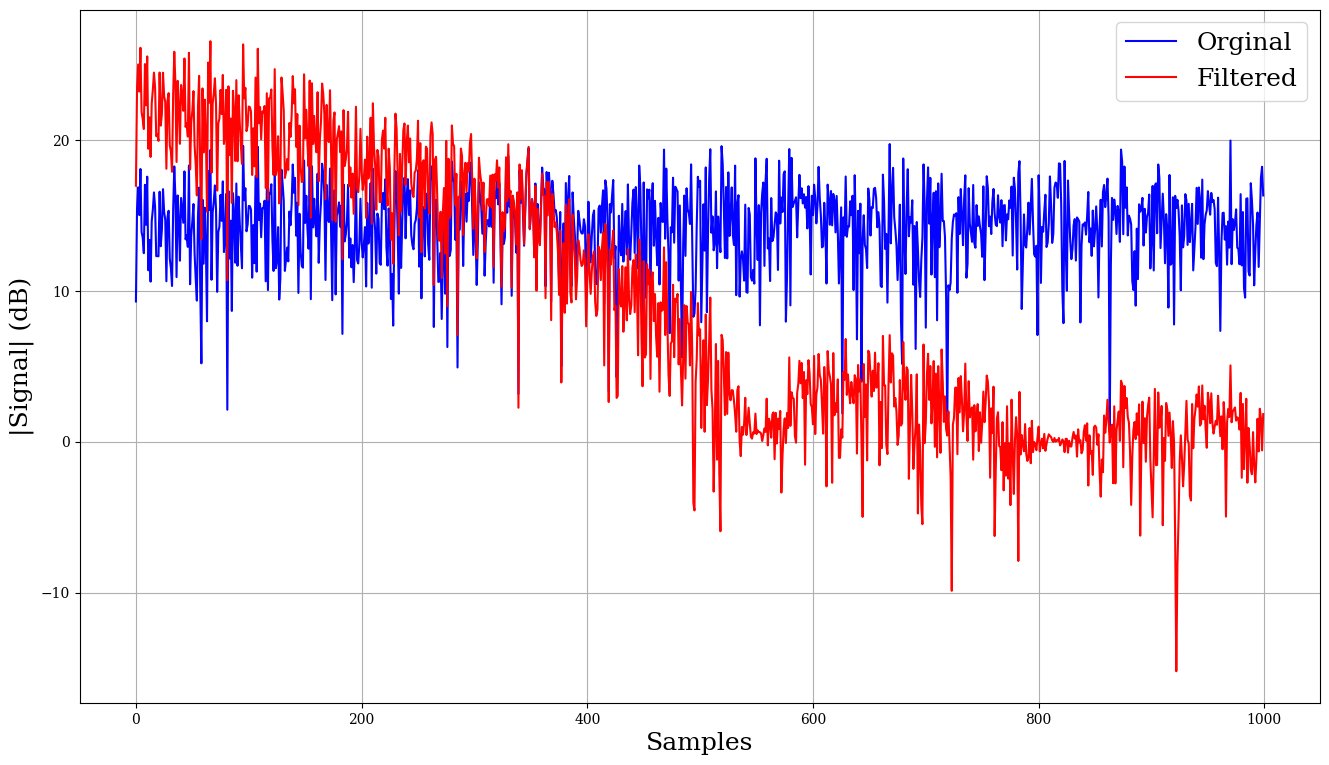

In [16]:
plt.figure(6)
plt.plot(DATA_MAG[1000:2000],'b',alpha=0.99,label='Orginal')
plt.plot(SIGNAL_MAG[1000:2000],'r',alpha=0.99,label='Filtered')
plt.legend(loc='upper right',fontsize=18)
plt.xlabel('Samples',fontsize=18)
plt.ylabel('|Signal| (dB)',fontsize=18)
plt.grid()
plt.show()